<a href="https://colab.research.google.com/github/laresamdeola/Machine-Learning/blob/main/Audio_Engineering_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import librosa
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import os

In [44]:
data_filepaths = os.listdir('/content/sample_data/Audio_Data')

In [45]:
len(data_filepaths)

496

In [46]:
# Function to extract features from audio files
def extract_features(file_path):
    y, sr = librosa.load(file_path, duration=2.97)  # Load audio file
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extract MFCC features
    return np.mean(mfccs.T, axis=0)  # Return the mean of MFCCs

In [47]:
# Function for data augmentation
def augment_data(features):
    # Add noise to features
    noise = 0.005 * np.random.randn(len(features))
    augmented_features = features + noise
    return augmented_features

In [48]:
# Load data and extract features
def load_data_and_extract_features(file_paths, labels):
    features = []
    augmented_features = []
    for file_path, label in zip(file_paths, labels):
        feature = extract_features(file_path)
        augmented_feature = augment_data(feature)
        features.append(feature)
        augmented_features.append(augmented_feature)
    return np.array(features), np.array(augmented_features), np.array(labels)

In [49]:
# Load audio files and labels
file_paths = ['/content/sample_data/Audio_Data/' + i for i in data_filepaths]  # List of file paths
labels = [label == 'Noise' if 'm4a' in label else label == 'Truth' for label in file_paths]  # List of corresponding labels

# Extract features and perform data augmentation
features, augmented_features, labels = load_data_and_extract_features(file_paths, labels)

# Combine original and augmented features
all_features = np.vstack((features, augmented_features))
all_labels = np.hstack((labels, labels))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels, test_size=0.2, random_state=42)

<ipython-input-46-08d74a0b0ad9>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, duration=2.97)  # Load audio file
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-46-08d74a0b0ad9>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, duration=2.97)  # Load audio file
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-46-08d74a0b0ad9>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, duration=2

In [50]:
len(X_train)

793

In [51]:
len(X_test)

199

In [52]:
# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [53]:
# Define classifiers
classifiers = {
    "ANN": MLPClassifier(hidden_layer_sizes=(100,), max_iter=50),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

In [54]:
# Train classifiers and evaluate using cross-validation
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name}...")
    scores = cross_val_score(clf, X_train, y_train_encoded, cv=5, scoring='accuracy')
    print(f"Cross-validation accuracy for {clf_name}: {np.mean(scores)}")

Training ANN...
Cross-validation accuracy for ANN: 1.0
Training Decision Tree...
Cross-validation accuracy for Decision Tree: 1.0
Training Random Forest...
Cross-validation accuracy for Random Forest: 1.0


In [55]:
# Stacking Ensemble Classifier
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=MLPClassifier(hidden_layer_sizes=(100,), max_iter=50))
print("Training Stacking Ensemble...")
stacking_scores = cross_val_score(stacking_clf, X_train, y_train_encoded, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy for Stacking Ensemble: {np.mean(stacking_scores)}")

Training Stacking Ensemble...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validation accuracy for Stacking Ensemble: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [56]:
# Train classifiers on full training data
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name}...")
    clf.fit(X_train, y_train_encoded)

Training ANN...
Training Decision Tree...
Training Random Forest...


In [57]:
# Train Stacking Ensemble on full training data
print("Training Stacking Ensemble...")
stacking_clf.fit(X_train, y_train_encoded)

Training Stacking Ensemble...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('dt', DecisionTreeClassifier(random_state=42))],
                   final_estimator=MLPClassifier(max_iter=50))

In [58]:
# Evaluate classifiers on test data
for clf_name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    print(f"Evaluation metrics for {clf_name}:")
    print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred)}")
    print(f"F1 Score: {f1_score(y_test_encoded, y_pred, average='weighted')}")
    print(f"Precision: {precision_score(y_test_encoded, y_pred, average='weighted')}")
    print(f"Recall: {recall_score(y_test_encoded, y_pred, average='weighted')}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test_encoded, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test_encoded, y_pred)}")

Evaluation metrics for ANN:
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[199]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       199

    accuracy                           1.00       199
   macro avg       1.00      1.00      1.00       199
weighted avg       1.00      1.00      1.00       199

Evaluation metrics for Decision Tree:
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[199]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       199

    accuracy                           1.00       199
   macro avg       1.00      1.00      1.00       199
weighted avg       1.00      1.00      1.00       199

Evaluation metrics for Random Forest:
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[199]]
Classification Report:
              precision    recall  f1-

In [59]:
# Evaluate Stacking Ensemble on test data
y_pred_stacking = stacking_clf.predict(X_test)
print("Evaluation metrics for Stacking Ensemble:")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_stacking)}")
print(f"F1 Score: {f1_score(y_test_encoded, y_pred_stacking, average='weighted')}")
print(f"Precision: {precision_score(y_test_encoded, y_pred_stacking, average='weighted')}")
print(f"Recall: {recall_score(y_test_encoded, y_pred_stacking, average='weighted')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test_encoded, y_pred_stacking)}")
print(f"Classification Report:\n{classification_report(y_test_encoded, y_pred_stacking)}")

Evaluation metrics for Stacking Ensemble:
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[199]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       199

    accuracy                           1.00       199
   macro avg       1.00      1.00      1.00       199
weighted avg       1.00      1.00      1.00       199



In [60]:
# # Compute ROC-AUC curve for each classifier
# plt.figure(figsize=(10, 8))
# for clf_name, clf in classifiers.items():
#     y_score = clf.predict_proba(X_test)
#     fpr, tpr, _ = roc_curve(y_test_encoded, y_score[:, 1], pos_label=label_encoder.transform([label_encoder.classes_[1]])[0])
#     roc_auc = auc(fpr, tpr)
#     plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')

In [61]:
# y_score_stacking = stacking_clf.predict_proba(X_test)
# fpr_stacking, tpr_stacking, _ = roc_curve(y_test_encoded, y_score_stacking[:, 1], pos_label=label_encoder.transform([label_encoder.classes_[1]])[0])
# roc_auc_stacking = auc(fpr_stacking, tpr_stacking)
# plt.plot(fpr_stacking, tpr_stacking, label=f'Stacking Ensemble (AUC = {roc_auc_stacking:.2f})', linestyle='--')

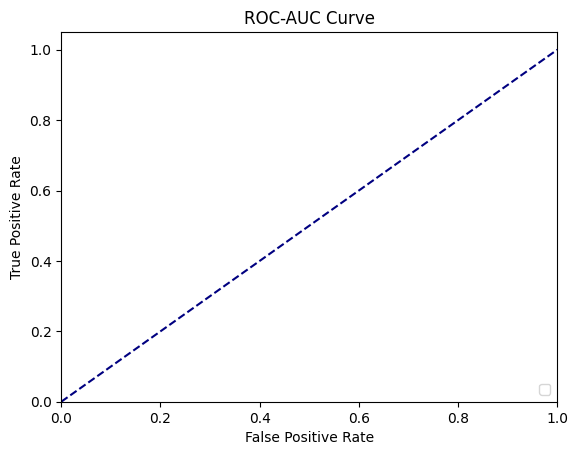

In [62]:
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()